以下是一个综合的 Python 示例，涵盖了 **Matplotlib 学习大纲** 中的主要知识点。这个示例通过一个完整的脚本，展示如何使用 Matplotlib 绘制多种类型的图表（折线图、散点图、柱状图、直方图、饼图、箱线图、3D 图表、动态图表等），并结合 NumPy 和 Pandas 进行数据处理，展示子图、自定义样式、注释、双轴图表等功能。代码中包含详细注释，便于理解每个部分的用途。

为了保持清晰，示例将数据可视化任务集中在分析一个模拟的“销售数据集”上，涵盖大纲中的核心内容。代码使用 Python 和 Matplotlib，适合在 Jupyter Notebook 或标准 Python 环境中运行。

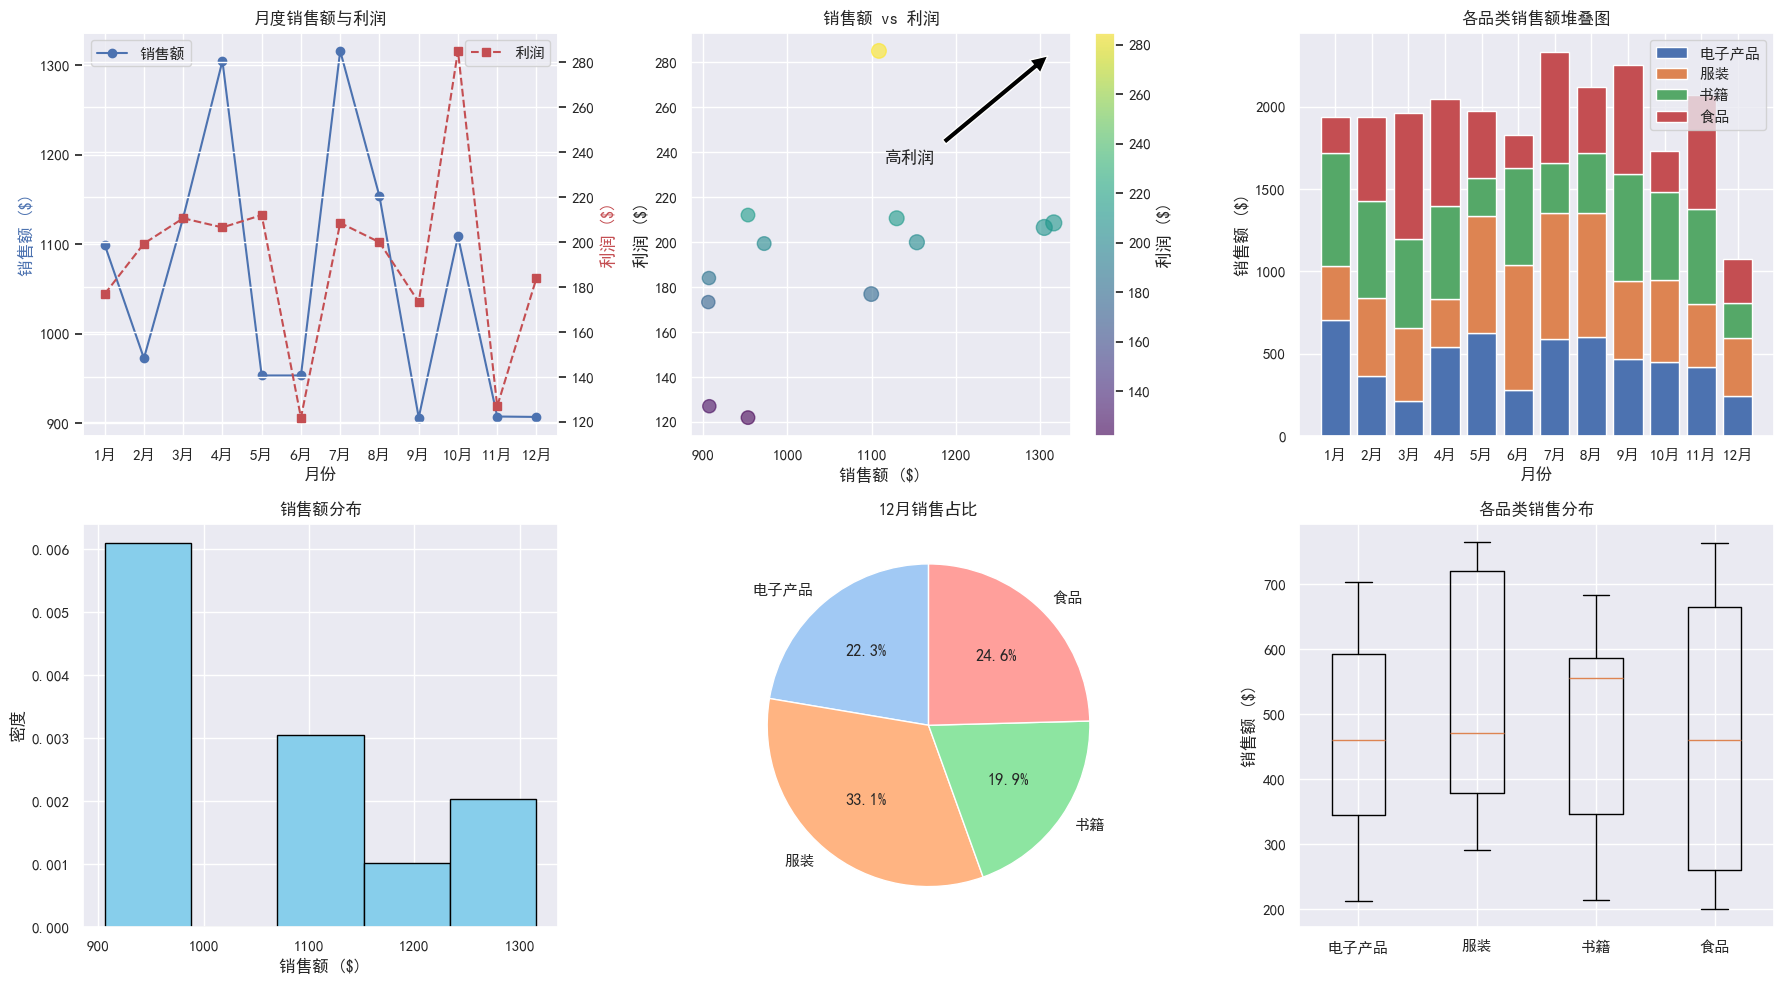

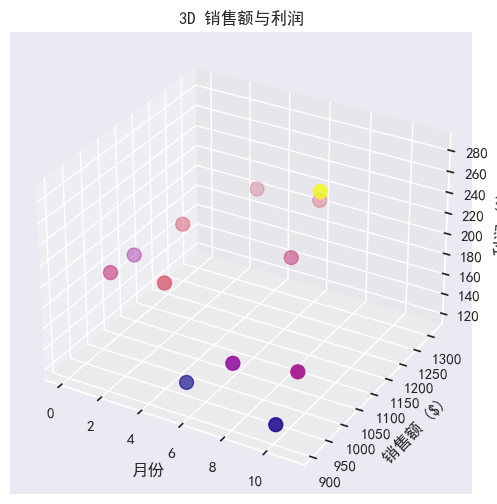

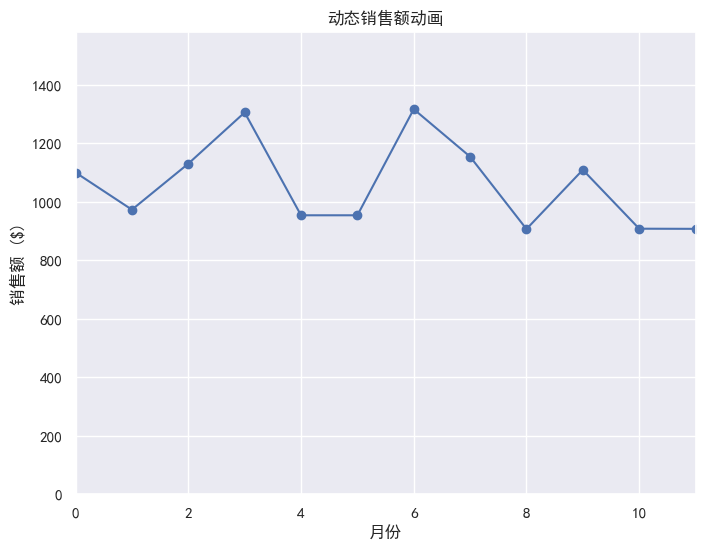

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import seaborn as sns

# 设置 Qt 环境变量以消除 QT_DEVICE_PIXEL_RATIO 警告
os.environ["QT_AUTO_SCREEN_SCALE_FACTOR"] = "1"

# 可选：切换到 TkAgg 后端（如果不想用 Qt）
# matplotlib.use('TkAgg')

# 设置 Seaborn 主题（需要安装 Seaborn: pip install seaborn）
sns.set_theme()  # 如果未安装 Seaborn，可替换为 plt.style.use('seaborn-v0_8') 或 'ggplot'

# 设置中文显示（解决中文乱码）
plt.rcParams['font.sans-serif'] = ['SimHei']  # Windows 使用 SimHei 字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 生成模拟销售数据
np.random.seed(42)
months = ['1月', '2月', '3月', '4月', '5月', '6月', '7月', '8月', '9月', '10月', '11月', '12月']
sales = np.random.normal(1000, 200, 12)  # 模拟月度销售额
profit = sales * np.random.uniform(0.1, 0.3, 12)  # 模拟利润
categories = ['电子产品', '服装', '书籍', '食品']
category_sales = np.random.randint(200, 800, size=(12, len(categories)))
df = pd.DataFrame(category_sales, index=months, columns=categories)

# 创建 Figure 和子图布局（2x3 网格）
fig, axes = plt.subplots(2, 3, figsize=(18, 10), tight_layout=True)

# 1. 折线图：月度销售额和利润（双 Y 轴）
ax1 = axes[0, 0]
ax1.plot(months, sales, marker='o', linestyle='-', color='b', label='销售额')
ax1_twin = ax1.twinx()  # 双 Y 轴
ax1_twin.plot(months, profit, marker='s', linestyle='--', color='r', label='利润')
ax1.set_title('月度销售额与利润')
ax1.set_xlabel('月份')
ax1.set_ylabel('销售额 ($)', color='b')
ax1_twin.set_ylabel('利润 ($)', color='r')
ax1.grid(True)
ax1.legend(loc='upper left')
ax1_twin.legend(loc='upper right')

# 2. 散点图：销售额与利润的关系
ax2 = axes[0, 1]
scatter = ax2.scatter(sales, profit, s=sales/10, c=profit, cmap='viridis', alpha=0.6)
ax2.set_title('销售额 vs 利润')
ax2.set_xlabel('销售额 ($)')
ax2.set_ylabel('利润 ($)')
fig.colorbar(scatter, ax=ax2, label='利润 ($)')
ax2.annotate('高利润', xy=(max(sales), max(profit)), xytext=(max(sales)-200, max(profit)-50),
             arrowprops=dict(facecolor='black', shrink=0.05))

# 3. 柱状图：各品类销售额（堆叠）
ax3 = axes[0, 2]
bottom = np.zeros(len(months))
for category in categories:
    ax3.bar(months, df[category], bottom=bottom, label=category)
    bottom += df[category]
ax3.set_title('各品类销售额堆叠图')
ax3.set_xlabel('月份')
ax3.set_ylabel('销售额 ($)')
ax3.legend()

# 4. 直方图：销售额分布
ax4 = axes[1, 0]
ax4.hist(sales, bins=5, color='skyblue', edgecolor='black', density=True)
ax4.set_title('销售额分布')
ax4.set_xlabel('销售额 ($)')
ax4.set_ylabel('密度')

# 5. 饼图：最后一个月的品类销售占比
ax5 = axes[1, 1]
ax5.pie(df.iloc[-1], labels=categories, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
ax5.set_title('12月销售占比')

# 6. 箱线图：各品类销售分布（修复 labels 为 tick_labels）
ax6 = axes[1, 2]
ax6.boxplot([df[cat] for cat in categories], tick_labels=categories)  # 使用 tick_labels
ax6.set_title('各品类销售分布')
ax6.set_ylabel('销售额 ($)')

# 调整子图间距
plt.tight_layout()

# 保存综合图表
plt.savefig('res/sales_analysis.png', dpi=300, bbox_inches='tight')

# 7. 3D 散点图：销售额、利润和月份
fig_3d = plt.figure(figsize=(8, 6))
ax_3d = fig_3d.add_subplot(111, projection='3d')
ax_3d.scatter(range(12), sales, profit, c=profit, cmap='plasma', s=100)
ax_3d.set_xlabel('月份')
ax_3d.set_ylabel('销售额 ($)')
ax_3d.set_zlabel('利润 ($)')
ax_3d.set_title('3D 销售额与利润')
plt.savefig('res/3d_sales.png', dpi=300)

# 8. 动态图表：模拟销售额随时间变化
fig_anim = plt.figure(figsize=(8, 6))
ax_anim = fig_anim.add_subplot(111)
line, = ax_anim.plot([], [], 'b-', marker='o')
ax_anim.set_xlim(0, 11)
ax_anim.set_ylim(0, max(sales) * 1.2)
ax_anim.set_xlabel('月份')
ax_anim.set_ylabel('销售额 ($)')
ax_anim.set_title('动态销售额动画')
ax_anim.grid(True)

def update(frame):
    line.set_data(range(frame + 1), sales[:frame + 1])
    return line,

ani = FuncAnimation(fig_anim, update, frames=len(months), interval=500, blit=True)
ani.save('res/sales_animation.gif', writer='pillow')

# 显示所有图表
plt.show()

### **代码说明**
1. **基础功能**（模块 1）：
   - 使用 `plt.style.use('seaborn')` 设置主题。
   - 创建 `Figure` 和 `Axes` 对象，使用 `plt.subplots()` 布局。
   - 保存图表为 PNG 和 GIF 格式。
2. **核心绘图类型**（模块 2）：
   - 折线图：绘制销售额和利润（双 Y 轴）。
   - 散点图：展示销售额与利润的关系，使用颜色映射。
   - 柱状图：堆叠各品类的销售额。
   - 直方图：展示销售额分布。
   - 饼图：显示最后一个月的品类销售占比。
   - 箱线图：比较各品类销售分布。
3. **图表定制**（模块 3）：
   - 设置标题、轴标签、图例和网格。
   - 自定义颜色、透明度和点大小。
   - 使用 Seaborn 调色板美化饼图。
4. **进阶功能**（模块 4）：
   - 双 Y 轴图表：结合折线图显示销售额和利润。
   - 3D 散点图：展示月份、销售额和利润的关系。
   - 动态图表：使用 `FuncAnimation` 创建销售动画。
   - 注释：在散点图中添加箭头和文本。
5. **数据处理**（模块 5）：
   - 使用 NumPy 生成模拟数据。
   - 使用 Pandas DataFrame 组织数据。
   - 结合 Seaborn 的调色板进行美化。
6. **实际应用**（模块 6）：
   - 模拟销售数据分析场景，生成多种图表。
   - 输出专业可视化结果，保存为文件。
7. **Matplotlib 生态**（模块 7）：
   - 结合 Seaborn 进行颜色美化。
   - 使用 `mpl_toolkits.mplot3d` 绘制 3D 图表。
8. **调试与优化**（模块 8）：
   - 使用 `tight_layout()` 避免子图重叠。
   - 优化文件输出（高 DPI 保存）。

### **运行说明**
- **依赖**：确保安装了 `numpy`、`pandas`、`matplotlib` 和 `seaborn`（`pip install numpy pandas matplotlib seaborn`）。
- **环境**：推荐在 Jupyter Notebook 中运行，以便逐块查看图表。
- **输出**：
  - 生成 `sales_analysis.png`（综合图表）。
  - 生成 `3d_sales.png`（3D 图表）。
  - 生成 `sales_animation.gif`（动态图表）。
- **中文支持**：如果遇到中文乱码，请设置 Matplotlib 的字体，例如 `plt.rcParams['font.sans-serif'] = ['SimHei']`（Windows）或 `['Arial Unicode MS']`（macOS）。